# Ant Colony Optimization
**References: **

[[1] O. Cordon, F. Herrera, T. Stützle (2002), A review on the ant colony optimization metaheuristic: Basis, models and new trends, Mathware & Soft Computing 9](https://www.researchgate.net/publication/28246325_A_review_on_the_ant_colony_optimization_metaheuristic_Basis_models_and_new_trends) 

Like particle swarm optimization, ant colony optimization is a technique that aims to utilize learning from nature to optimize a target funtion. They are an exmaple of metaheuristic algorithms first introduced in a paper by Dorigo, Maniezzo and Colorni titled [Ant System(1996)](https://ieeexplore.ieee.org/document/484436). The feature of real ants that ant colony algorithms aim to copy is thei ability to find the shortest path between then colony and it's food source. Some species of ants are even blind, and hence they deposit a *pheromone* as they move. If an ant does not encounter any pheromone in it's surroundings, it moves essentially at random. However, it's movement is markedly changed in the presence of a pheromone. Ants probabilistically choose the path to follow based on the amount of pheromone they can sense from that path. Since each ant will also deposit it's own pheromone while travelling, there is a self-reinforcing loop that is created.

The ants are able to discover the shortest path becuase of the fact that ants following the shorter path are ablet o do more journeys on that path, increasing the density of the pheromone deposited even further. This process is further complicated by the fact that pheromone evapourates over time, with less visited paths becoming less and less likely to be taken.

## Problems that can be solved by ACO
ACO (Ant Colony OPtimization) algorithms are mostly used to solve combinatorial problems like the [knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem), the [vehicle routing problem](https://en.wikipedia.org/wiki/Vehicle_routing_problem), the [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) etc. They are usually applied to discrete decision spaces (though continuous decision space versions exist). For such shortest path problems, the problem can be defined using a graph structure $G=(N, A)$ where $N$ is the set of nodes and $A$ is the set of edges connecting them. Each edge $a\in A$ can be associated with an explicit transition cost $c_{rs}$ (moving  between nodes $r\to s$). Each edge also may have two types of information associated with it:

* *Heuristic information*: denoted by $\eta_{rs}$, it provides information related tot hespecific problem which is constant over time.
* *(Artificial) pheromone trail information*: denoted by $\tau_{rs}$, it is information that is learned over time as a collective knowledge of the ant colony. 

## The artificial ant
The artificial ant has a number of properties as it searches for the minimum cost solution to a problem:

* **Memory $L$**: stored information about thepath followed by the ant. THis can be useful for generating new solutions, evalute the current solution and retrace the ant's path.
* **Initial state $\delta_{initial}$**: may be defined based on the problem.
* **Movement**: at ant instant $t$, the ant is in state $\delta_r = <\delta_{t-1}, r>$ where $r$ is it's current location. From location $r$, it can move to any other location $s\in \mathcal{N}(r)$ where $\mathcal{N}(r) = \{s|a_{rs}\in A\text{ and }<\delta_r,s>\in\tilde{\Delta}\}$ is the neighbourhood of $r$. The second condition ensures that the new node $s$ is *feasible* (for example in travelling salesman problem, you don't want to visit a node you have already visited).
* **Transition rule**: The selection of $s\in\mathcal{N}(r)$ is based on a transition rule, that can dependon a variety of factors like pheromone trails, heuristic values, ants private memory or just randomness.
* **Online step-by-step pheromone trail update**: As the ant moves from $r\to s$, it updates $\tau_{rs}$.
* **Online delayed pheromone trail update**: Once the ant has reached the objective, it can retrace the travelled path, updating pheromone trails along the way.
* **Offline pheromone trail update**: These updates are done by *daemon actions* which are not caused by any single ant but in fact tasks evaluated from a global perspective of the entire colony. There is no eqivalent if this in nature.

Unlike real ants, the "strength" of the pheromone trail update for artificial ants can be based on the quality of the solution found by them. Also, different versions of ACO do either one of online / online delayed / offline pheromone trail update. Artifiial ants can also build in the "pheromone evapouration" over time. This is crucial to prevent the colony from getting stuck in a local optima.

I find the following structure for the generic ACO algorithm (taken from [[1]](https://www.researchgate.net/publication/28246325_A_review_on_the_ant_colony_optimization_metaheuristic_Basis_models_and_new_trends)) very useful:

![Generic ACO algorithm structure](Images/ACO_generic.png)

## Ant Colony Optimization Models
The paper [[1]](https://www.researchgate.net/publication/28246325_A_review_on_the_ant_colony_optimization_metaheuristic_Basis_models_and_new_trends) goes through several ACO models:

1. [Ant System](https://ieeexplore.ieee.org/document/484436): The original model, of historical interest. The transition probability for each ant is given by:

$$p^k_{rs} = \frac{[\tau_{rs}]^\alpha\cdot [\eta_{rs}]^\beta}{\sum_{u\in \mathcal{N}^k_r}[\tau_{ru}]^\alpha\cdot [\eta_{ru}]^\beta}$$

where the parameters $\alpha, \beta$ weigh the relative importance of pheromone trail and the heuristic information. At every iteration, a proportion of the pheromone trail evaporates using the equation: $\tau_{rs} \leftarrow (1-\rho) \tau_{rs}$ where $\rho$ is the evapouration rate. After that, each ant deposits it's pheromone using an online delayed update: $\tau_{rs} \leftarrow \tau_{rs} + f(C(S_k))$ where $C(S_k)$ is the quality of the solution $S_k$.

2. [Ant Colony System](https://people.idsia.ch/~luca/acs-ec97.pdf): Changes the transition rule to be psuedo-random (similar to epsilon greedy action sampling in reinforcement learning). It also encourages ants to find different solutions than those already found by decreases the pheromone trail when an ant traverses an edge.
3. [Max-Min Ant System](https://link.springer.com/chapter/10.1007/978-3-7091-6492-1_54): The possible values for the pheromone trails are limited to a min-max range.
4. [Rank-based Ant System](https://epub.wu.ac.at/616/1/document.pdf): $m$ ants are ranked based on the quality of their solution. In turn, the pheromone update is applied as a daemon action based on the rank of the ants.
5. [Best-Worst Ant System](https://www.researchgate.net/publication/313071572_A_new_ACO_model_integrating_evolutionary_computation_concepts_The_best-worst_ant_system): Adds evolutionary concepts to the ant system by also penalizing the worst solution found in every iteration. On top of that, pheromone trails can be mutated based on a probability.

## Code Implementation
Some salient features of the implementation:

* Pheromone evaporation based on factor $\rho: \tau_{rs} \leftarrow (1-\rho) \tau_{rs}$.
* Stochastic transition rate based on `explore_rate`. If a random number $r<$`explore_rate`, then the transition is stochastic conditioned on the transition probabilities. If $r>$`explore_rate, then the best transition is chosen.
* Intensification of pheromone for all $\tau_{rs}\in S_{\text{best in iteration}}$
* Evapouration for $\beta$ parameter as well, allowing the heuristic to become less and less important over time, as the ants learn more and more.
* Multi-processing implementation that runs `n_jobs` number of ants in each iteration in parallel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from multiprocessing import cpu_count
from multiprocessing.pool import ThreadPool

In [2]:
class ACO:
    def __init__(self, dist_matrix, n_ants, alpha, beta, evaporation_rate, intensification, beta_evapouration_rate=0.0, explore_rate=0.9, n_jobs=1):
        '''
        Ant colony optimizer deisgned to minimize the distance travelled while traversing a graph.
        :param dist_matrix: n x n matrix of distances between nodes
        :param n_ants: number of ants in colony
        :param alpha: preference for pheromone
        :param beta: preference for heuristic
        :param evaporation_rate: rate at which phermone evaporates
        :param intensification: daemon task of adding constant to best path
        :param beta_evaporation_rate: rate at which the heuristic value decays, default 0
        :param explore_rate: probability of choosing a random next node based on transition probablity, default 0.9
        :param n_jobs: number of parallel ants to run
        '''
        self.n_ants, self.alpha, self.beta, self.evap_r = n_ants, alpha, beta, evaporation_rate
        self.intensification, self.beta_evap_r, self.explore_r = intensification, beta_evapouration_rate, explore_rate

        self.fit, self.best_path, self.best_score, self.best_per_it = False, None, np.inf, []

        assert dist_matrix.shape[0] == dist_matrix.shape[1], "dist_matrix must be square!"
        self.map = dist_matrix
        n_nodes = dist_matrix.shape[0]
        self.pheromone_matrix = np.ones((n_nodes, n_nodes))
        self.pheromone_matrix[np.eye(n_nodes)==1] = 0.0
        self.heuristic_matrix = 1/self.map
        self.transition_prob = (self.pheromone_matrix ** self.alpha) * (self.heuristic_matrix ** self.beta)
        self.score_path = self.score_path_rotated if n_nodes>70 else self.score_path_bruteloop
        if n_jobs==-1:
            self.n_jobs = cpu_count()
        else:
            self.n_jobs = n_jobs
        self.pool = ThreadPool(self.n_jobs)
        self.best_path_hist = []

    def get_next_node(self, curr, nodes_left):
        '''
        Get the next node based on the current node and nodes left to traverse.
        If p < explore_rate, then select next from probability ditribution over remaining nodes
        Else, select node with least transition probability
        :param curr: current node
        :param nodes_left: nodes left to traverse by particular ant
        :return: node to traverse to
        '''
        num = self.transition_prob[curr, nodes_left]
        if np.random.rand() < self.explore_r:
            return np.random.choice(nodes_left, p=num/np.sum(num))
        else:
            return nodes_left[np.argmax(num)]

    def score_path_rotated(self, path):
        '''
        Get quality of path
        :param path: list of node indices travelled in sequence
        :return score:
        '''
        rotated_path = path.copy()
        rotated_path.append(rotated_path.pop(0))
        return np.sum(self.map[path, rotated_path])     # faster than if loop if n_nodes > ~70

    def score_path_bruteloop(self, path):
        '''
        Get quality of path
        :param path: list of node indices travelled in sequence
        :return score:
        '''
        score = 0
        for i in range(len(path) - 1):
            score += self.map[path[i], path[i + 1]]
        return score + self.map[path[-1], path[0]]     # faster if n_nodes < ~70


    def start_and_run_ant(self, ant_id):
        nodes_left = list(range(self.map.shape[0]))
        node_start = np.random.randint(0, len(nodes_left))
        node_curr, path = node_start, [node_start]
        nodes_left.remove(node_curr)

        while nodes_left:
            node_curr = self.get_next_node(node_curr, nodes_left)
            path.append(node_curr)
            nodes_left.remove(node_curr)
        return path, self.score_path(path)

    def evapourate(self):
        '''
        Evapourate the pheromone using the evapouration rate. Also reduce beta as required
        '''
        self.pheromone_matrix *= (1-self.evap_r)
        self.beta *= (1-self.beta_evap_r)

    def intensify(self, path):
        '''
        Add extra pheromone to the path given
        :param path: path which achieved best result in that iteration
        '''
        rotated_path = path.copy()
        rotated_path.append(rotated_path.pop(0))
        self.pheromone_matrix[path, rotated_path] += self.intensification

    def update_transition_probs(self):
        self.transition_prob = (self.pheromone_matrix**self.alpha) * (self.heuristic_matrix**self.beta)

    def run(self, max_iter=100, early_stop=20):
        '''
        Run the ACO algorithm
        :param max_iter: Maximum number of iterations allowed
        :param early_stop: If best score does not change for early_stop iterations, stop
        '''
        same_result = 0
        start_t = time.time()
        for i in range(max_iter):
            parallel_results = self.pool.map(self.start_and_run_ant, np.arange(self.n_ants))
            iter_paths, iter_scores = zip(*parallel_results)
            # iter_paths, iter_scores = [], []
            # for j in range(self.n_ants):
                
            #     path, score = self.start_and_run_ant(j)
            #     iter_paths.append(path)
            #     iter_scores.append(score)
            best_ant = np.argmin(iter_scores)
            iter_best_path, iter_best_score = iter_paths[best_ant], iter_scores[best_ant]
            self.best_per_it.append(iter_best_score)
            if iter_best_score < self.best_score:
                self.best_score = iter_best_score
                self.best_path = iter_best_path.copy()
                same_result = 0
            elif iter_best_score == self.best_score:
                same_result += 1
            else:
                same_result = 0
            

            self.evapourate()
            self.intensify(iter_best_path)
            self.update_transition_probs()
            self.best_path_hist.append(self.best_path.copy())

            if same_result > early_stop:
                print('No change for the last {} iterations... stopping'.format(early_stop))
                break
        self.fit = True
        self.fit_time = time.time() - start_t
        return self.best_path, self.best_score

    def plot(self):
        if not self.fit:
            print('Optimization not yet run!')
        else:
            plt.plot(self.best_per_it, label="Best Run")
            plt.xlabel("Iteration")
            plt.ylabel("Performance")
            plt.text(.8, .6,
                    'Ants: {}\nEvap Rate: {}\nIntensify: {}\nAlpha: {}\nBeta: {}\nBeta Evap: {}\nExplore Rate: {}\n\nFit Time: {}m'.format(
                        self.n_ants, self.evap_r, self.intensification, self.alpha,
                        self.beta, self.evap_r, self.explore_r, self.fit_time // 60),
                    bbox={'facecolor': 'gray', 'alpha': 0.8, 'pad': 10})
            plt.legend()
            plt.title("Ant Colony Optimization Results (best: {})".format(np.round(self.best_score, 2)))    

## Solving TSP with ACO

In [3]:
class TravelSalesPerson(object):
    def __init__(self, n_cities, max_coor = 1):
        self.city_position = np.random.rand(n_cities, 2)*max_coor
        self.iter = 0
        self.n_cities = n_cities
        self.max_coor = max_coor

    def cost(self, visit_order):
        '''Calculates the total distance travelled when visiting the cities in the order provided.
        :param visit_order: (Nxd) matrix of N possible permutations of d cities
        :return dist: (1xN) vector of total distances travelled for each permutation 
        '''
        if visit_order.shape[1] != self.n_cities:
            raise Exception("visit_order should have dim[1] = number of cities")
        dist = np.zeros(visit_order.shape[0])
        for i in range(self.n_cities-1):
            dist += np.linalg.norm(self.city_position[visit_order[:, i], :] - self.city_position[visit_order[:, i+1], :], axis=1)

        dist += np.linalg.norm(self.city_position[visit_order[:, -1], :] - self.city_position[visit_order[:, 0], :], axis=1)
        return dist

    def get_dist_mat(self):
        '''Get the distance matrix for all cities
        :return dist: (NxN) matrix of total distances travelled for each permutation 
        '''
        dist = np.ones((self.n_cities, self.n_cities))
        for i in range(self.n_cities-1):
            for j in range(i+1, self.n_cities):
                dist[i,j] = np.linalg.norm(self.city_position[i, :] - self.city_position[j, :])
        i_lower = np.tril_indices(self.n_cities)
        dist[i_lower] = dist.T[i_lower]
        return dist

    def plotting(self, order, cost, save=False):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=10, c='k')
        lx, ly = self.city_position[order, 0], self.city_position[order, 1]
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % cost, fontdict={'size': 20, 'color': 'red'})
        # plt.xlim((-0.1, 1.1))
        # plt.ylim((-0.1, 1.1))
        if save: plt.savefig('Images/travelling_salesman/travelling_salesman_{:03d}'.format(self.iter))
        # if self.iter%100==0: plt.show()
        self.iter += 1

In [4]:
N_CITIES = 100
tsp = TravelSalesPerson(N_CITIES, max_coor=10)
aco = ACO(tsp.get_dist_mat(), n_ants=30, alpha=1, beta=0.5, evaporation_rate=0.1, intensification=2, explore_rate=0.9, n_jobs=-1)

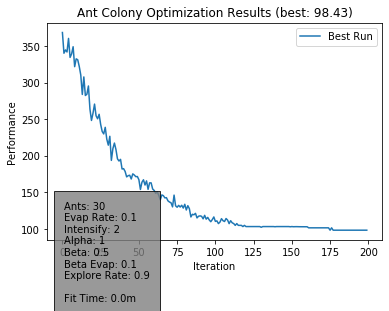

In [5]:
aco.run(max_iter=200)
aco.plot()

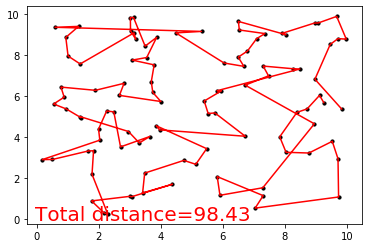

In [6]:
tsp.plotting(aco.best_path, aco.best_score)